# 1.1

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
samples = [x]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(x[start : end])


# 1.2

In [4]:
num_bins = 20


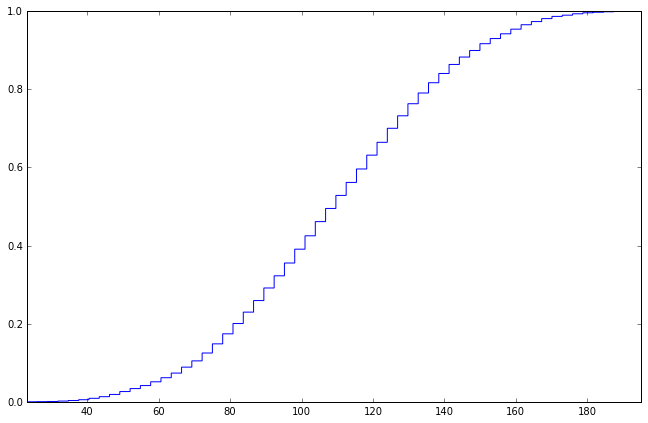

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num_bins * 3, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()


[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


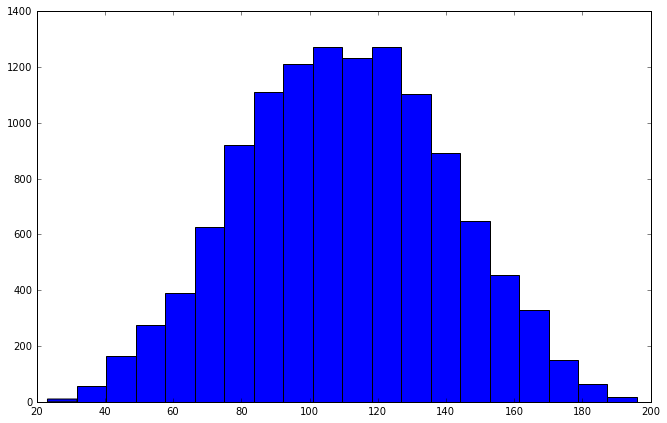

[   4.   18.   28.   42.   53.   78.  101.  111.  112.  139.  112.  111.
   80.   94.   45.   36.   26.   19.    5.    6.]


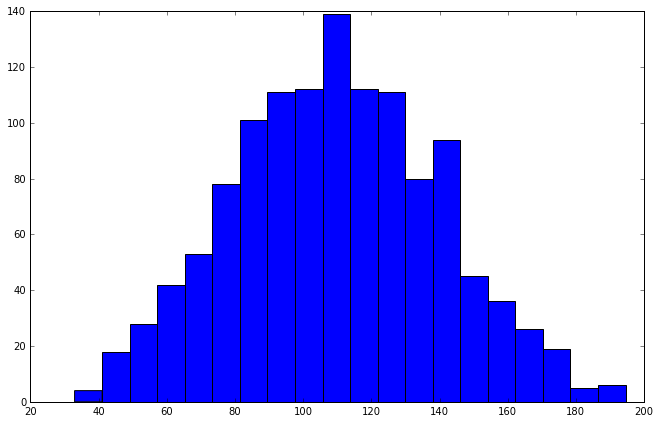

[   2.    4.   17.   24.   32.   63.   72.   89.  110.  114.  119.  114.
  121.   90.   76.   72.   45.   35.   17.    4.]


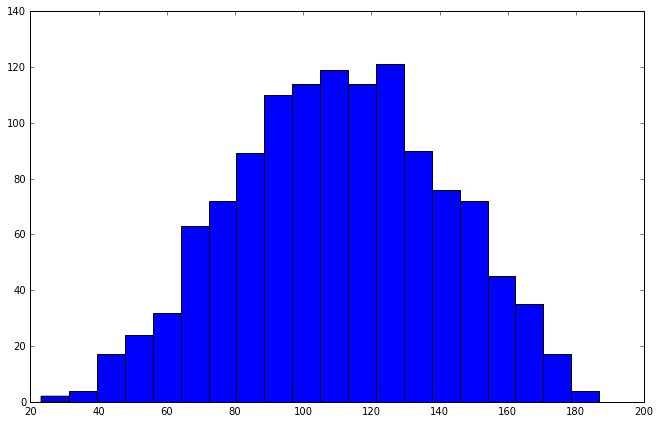

[  10.    9.   19.   31.   48.   77.   94.  111.  105.  118.  100.  116.
  115.   81.   75.   42.   30.   18.   17.    4.]


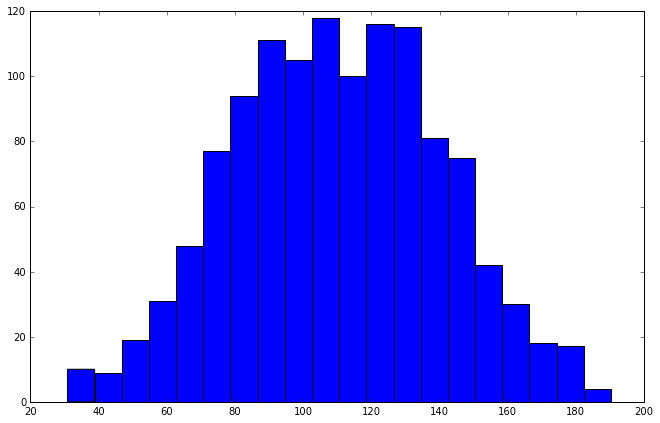

[   3.   10.   20.   20.   42.   59.   91.  115.  118.  117.  120.  105.
  119.  106.   61.   40.   47.   15.    8.    4.]


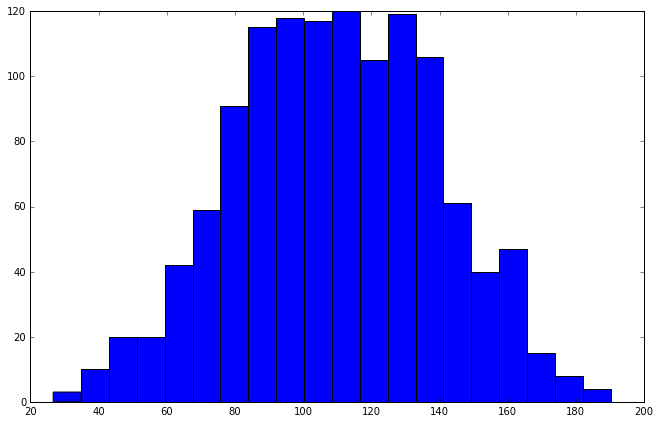

[   5.   12.   19.   34.   59.   76.   88.   89.  116.  110.  124.  125.
   94.   93.   56.   58.   37.   14.    7.    4.]


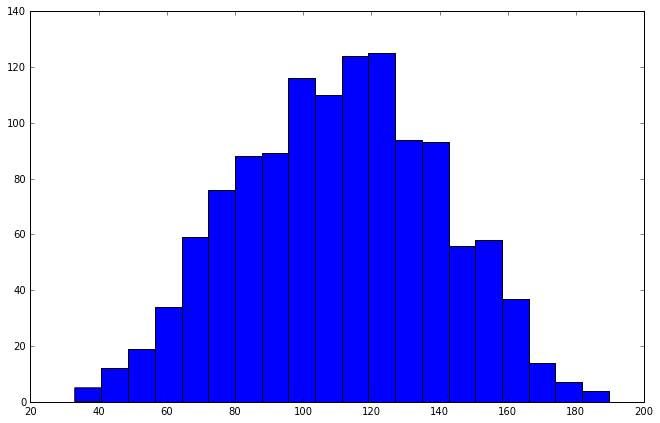

[   2.    5.   25.   36.   49.   47.   89.   90.  102.  135.  116.  132.
  107.   83.   68.   56.   32.   33.    9.    4.]


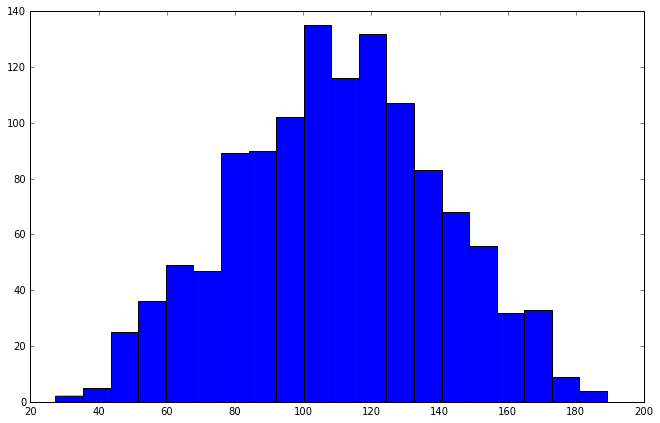

[   6.   19.   30.   34.   44.   78.   90.  109.  140.   99.  127.  117.
   98.   71.   54.   46.   35.   15.    6.    2.]


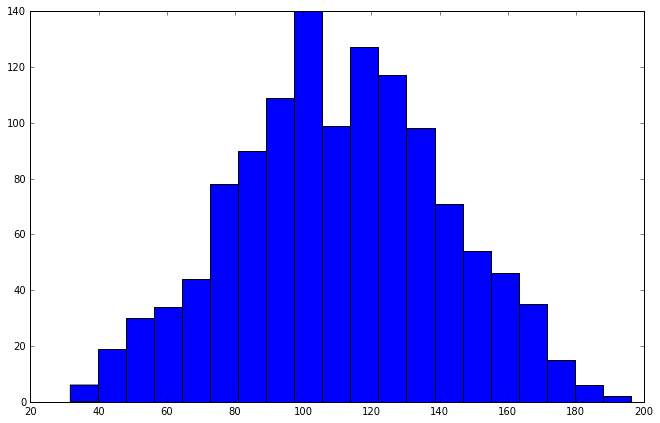

[   6.   16.   33.   30.   59.   75.  108.   94.  115.  127.  110.  108.
  102.   68.   65.   33.   41.   14.   13.    3.]


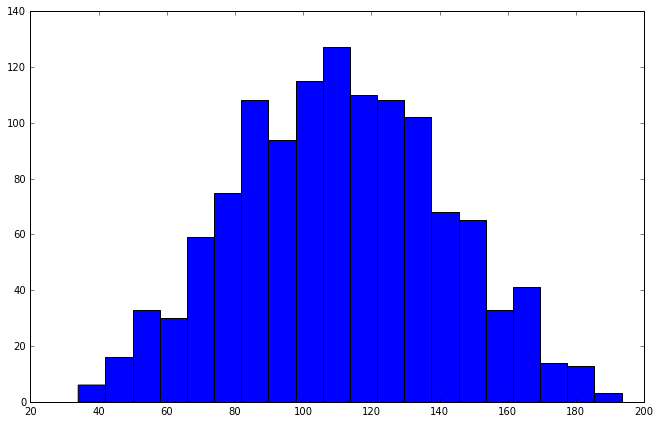

[   7.   17.   19.   22.   38.   77.  102.  104.  128.  103.  104.  130.
  108.   93.   62.   38.   33.   19.   11.    5.]


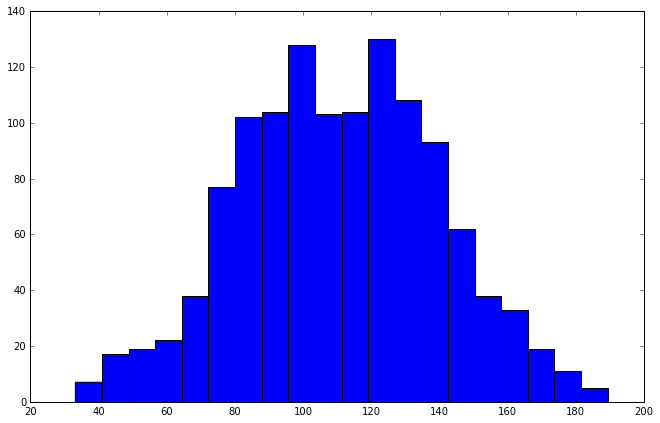

[   2.    9.   18.   26.   38.   55.  100.  106.  123.  118.  105.  106.
  108.   87.   83.   54.   45.   20.   11.    6.]


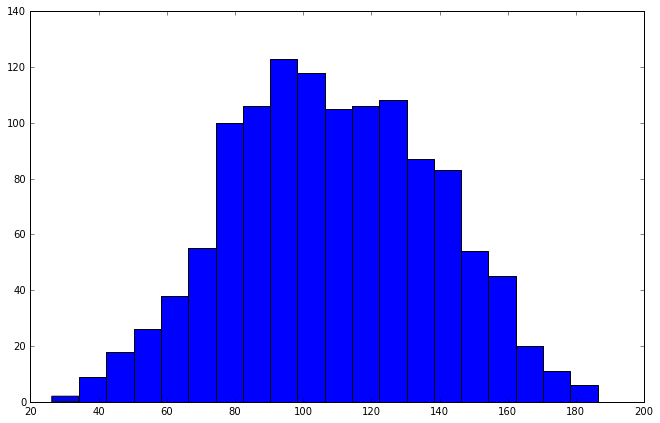

In [6]:
for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s, num_bins)
    print(n)
    plt.show()


# 1.3

In [7]:
import pandas as pd
import scipy.stats as st

d = {}

i = 1
for s in samples:
    d[i] = pd.Series([st.tmean(s), np.median(s), (min(x) + max(s))/2, st.mode(s)[0][0], st.skew(s), st.kurtosis(s)], 
                     ['mean', 'med', 'ср', 'mode', 'skew', 'kurt'])
    i += 1

pd.DataFrame(d).transpose()


,mean,med,ср,mode,skew,kurt
1,110.146511,110.0465,109.5949,101.0970,0.003295,-0.446862
2,109.636828,109.0020,108.8584,103.6760,0.084769,-0.385434
3,110.635604,110.8445,104.9819,101.9150,-0.055361,-0.528251
4,109.990055,109.8655,106.7049,120.7740,0.003635,-0.429667
5,109.682611,109.4010,106.6714,108.1790,-0.024916,-0.413782
6,110.597219,111.3870,106.3814,109.2890,-0.022241,-0.525434
7,110.117168,110.7745,106.1389,101.3920,-0.017126,-0.483566
8,110.806402,110.4485,109.5949,101.9790,-0.006754,-0.428345
9,110.749354,110.6145,108.2674,91.1949,0.053356,-0.447652
10,110.688583,110.9375,106.2364,103.1800,-0.009843,-0.326469


In [8]:
np.percentile(samples[0], 95)


160.29114999999996